In [13]:
import csv
import pandas as pd
from compute_tfidf import *

In [14]:
# csv table of top 10 words for each topic

topics_count = get_topics_count('../data/annotated.csv', '../data/stopwords.txt')
count_dict = get_topics_score(topics_count, 10)

topics_list = []
for topic in count_dict.keys():
    topics_list.append(topic)

words_list = []
for group in range(10):
    words = []
    for bar in count_dict.values():
        words.append(bar[group])
    words_list.append(words)

header = topics_list
file = open('../data/tfidf_table.csv', 'w')
writer = csv.writer(file)
writer.writerow(header)
writer.writerows(words_list)
file.close()

['HUR', 'OTH', 'PEH', 'POD', 'PUH', 'VAE']
[46, 13, 9, 22, 158, 11, 14, 27, 20, 78, 42, 24, 59, 166, 106, 93, 46, 66]
[46, 22, 14, 78, 59, 93]
[13, 158, 27, 42, 166, 46]
[9, 11, 20, 24, 106, 66]


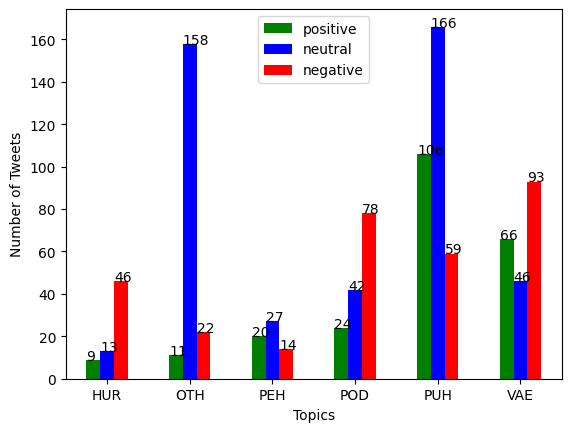

In [15]:
# graph of sentiment for each topic

df = pd.read_csv('../data/annotated.csv', encoding='unicode_escape')
df = df[['topics', 'sentiment']]

topics = sorted(df.topics.unique())
print(topics)

sentiment_list = df.groupby(['topics', 'sentiment'])['sentiment'].count().unstack(fill_value=0).stack().to_list()
print(sentiment_list)

negative_list = []
neutral_list = []
positive_list = []

for i in range(0,len(sentiment_list), 3):
    negative_list.append(sentiment_list[i])
    neutral_list.append(sentiment_list[i+1])
    positive_list.append(sentiment_list[i+2])
    
print(negative_list)
print(neutral_list)
print(positive_list)

df = pd.DataFrame({'positive': positive_list, 'neutral': neutral_list, 'negative': negative_list}, index=topics)
ax = df.plot.bar(rot=0, color=['green', 'blue', 'red'])

for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height))

ax.set_xlabel('Topics')
ax.set_ylabel('Number of Tweets')
fig = ax.get_figure()
fig.savefig('../data/figure1.png')

['HUR', 'OTH', 'PEH', 'POD', 'PUH', 'VAE']
1000
[68, 191, 61, 144, 331, 205]
[6.8, 19.1, 6.1, 14.4, 33.1, 20.5]


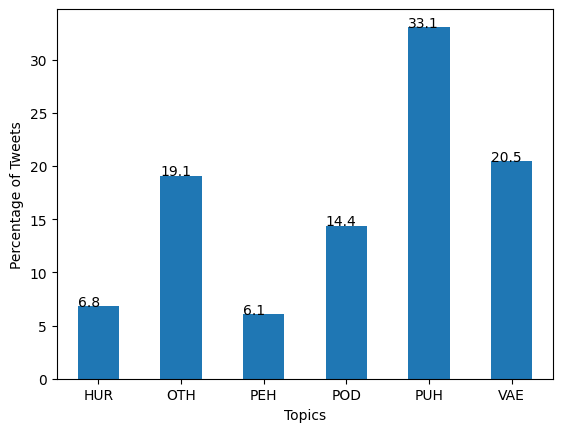

In [16]:
# graph for topics engagement

df = pd.read_csv('../data/annotated.csv', encoding='unicode_escape')

topics = sorted(df.topics.unique())
print(topics)

total_tweets = df.shape[0]
print(total_tweets)

count_list = df.groupby('topics')['topics'].count().to_list()
print(count_list)

for i in range(len(count_list)):
    count_list[i] = round(count_list[i]/total_tweets * 100, 2)
    
print(count_list)

df = pd.DataFrame(count_list, index=topics)
ax = df.plot.bar(rot=0, legend=False)

for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height))
    
ax.set_xlabel('Topics')
ax.set_ylabel('Percentage of Tweets')
fig = ax.get_figure()
fig.savefig('../data/figure2.png')